#  Data Analysis

Load the Data

In [8]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Data Exploration

In [9]:
print(f"Training data shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels: {y_test.shape}")

Training data shape: (60000, 28, 28), Labels: (60000,)
Test data shape: (10000, 28, 28), Labels: (10000,)


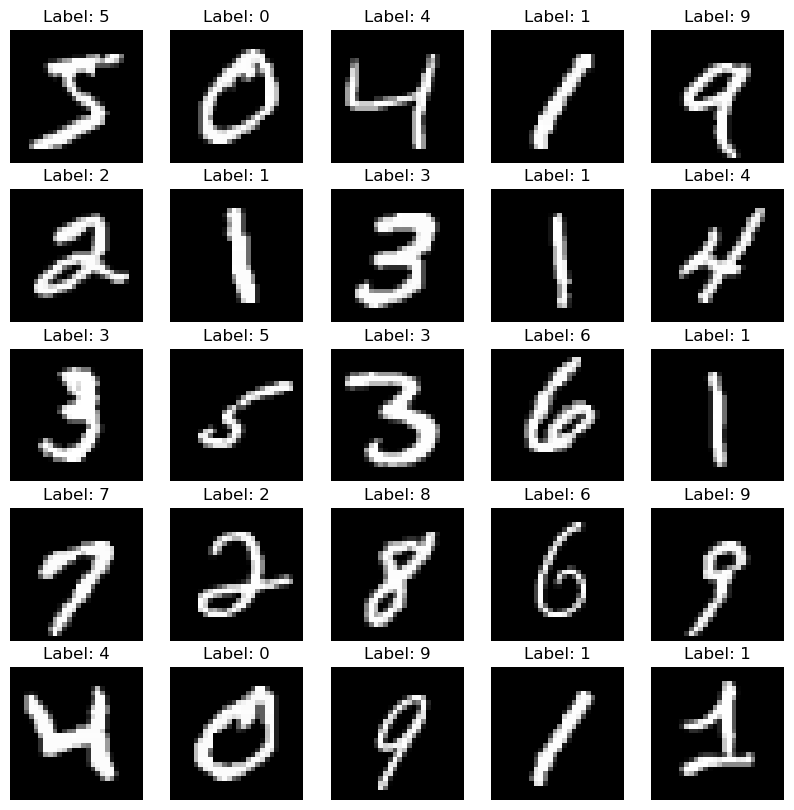

In [10]:
#Visualize Sample Images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

Data Distribution

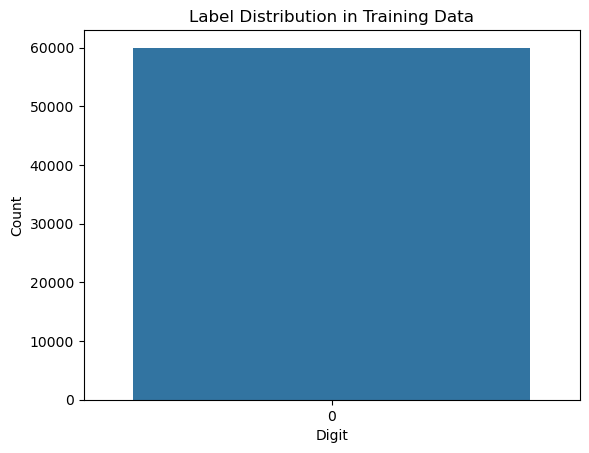

In [11]:
#Label Distribution
import seaborn as sns
import pandas as pd

sns.countplot(y_train)
plt.title('Label Distribution in Training Data')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

Preprocessing

In [12]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Classify Handwritten Digits 

Preprocessing

In [21]:
#Reshape Data for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

CNN Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))





Epoch 1/10


1875/1875 [==============================] - 26s 13ms/step - loss: 0.1284 - accuracy: 0.9611 - val_loss: 0.0441 - val_accuracy: 0.9859
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0407 - accuracy: 0.9870 - val_loss: 0.0353 - val_accuracy: 0.9889
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0280 - accuracy: 0.9911 - val_loss: 0.0321 - val_accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0368 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0327 - val_accuracy: 0.9913
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0119 - accuracy: 0.9959 - val_loss: 0.0352 - val_accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0

KNN Model

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)
knn.fit(x_train_flat, y_train)
y_pred_knn = knn.predict(x_test_flat)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.9705


SVM Model

In [16]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(x_train_flat, y_train)
y_pred_svm = svm.predict(x_test_flat)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 0.9404


Dense Neural Network (DNN)

In [22]:
model_dnn = Sequential([
    Dense(512, activation='relu', input_shape=(28*28,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_dnn.fit(x_train_flat, y_train, epochs=10, validation_data=(x_test_flat, y_test))



Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.1912 - accuracy: 0.9418 - val_loss: 0.0988 - val_accuracy: 0.9681
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0841 - accuracy: 0.9743 - val_loss: 0.0807 - val_accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0599 - accuracy: 0.9817 - val_loss: 0.0974 - val_accuracy: 0.9711
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0485 - accuracy: 0.9845 - val_loss: 0.0809 - val_accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0385 - accuracy: 0.9882 - val_loss: 0.0749 - val_accuracy: 0.9798
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0313 - accuracy: 0.9903 - val_loss: 0.0895 - val_accuracy: 0.9751
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0281 - accuracy: 0.9916 - val_loss: 0.0900 - val_ac

Recurrent Neural Network (RNN) with LSTM

In [23]:
from tensorflow.keras.layers import LSTM

# Reshape data for RNN
x_train_rnn = x_train.reshape(-1, 28, 28)
x_test_rnn = x_test.reshape(-1, 28, 28)

model_rnn = Sequential([
    LSTM(128, input_shape=(28, 28)),
    Dense(10, activation='softmax')
])

model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_rnn.fit(x_train_rnn, y_train, epochs=10, validation_data=(x_test_rnn, y_test))

Epoch 1/10
1875/1875 [==============================] - 55s 27ms/step - loss: 0.3377 - accuracy: 0.8905 - val_loss: 0.1399 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1031 - accuracy: 0.9695 - val_loss: 0.0736 - val_accuracy: 0.9782
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0740 - accuracy: 0.9773 - val_loss: 0.0834 - val_accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0602 - accuracy: 0.9816 - val_loss: 0.0700 - val_accuracy: 0.9786
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0440 - val_accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0388 - accuracy: 0.9882 - val_loss: 0.0526 - val_accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.0662 -

# Comparing Models

Evaluate Models

In [24]:
# CNN Model
loss_cnn, accuracy_cnn = model_cnn.evaluate(x_test, y_test)
print(f"CNN Accuracy: {accuracy_cnn}")

313/313 [==============================] - 2s 6ms/step - loss: 0.0307 - accuracy: 0.9923
CNN Accuracy: 0.9922999739646912


In [25]:
# KNN Model
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.9705


In [26]:
# SVM Model
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 0.9404


In [27]:
# DNN Model
loss_dnn, accuracy_dnn = model_dnn.evaluate(x_test_flat, y_test)
print(f"DNN Accuracy: {accuracy_dnn}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0818 - accuracy: 0.9818
DNN Accuracy: 0.9818000197410583


In [28]:
# RNN Model Evaluation
loss_rnn, accuracy_rnn = model_rnn.evaluate(x_test_rnn, y_test)
print(f"RNN Accuracy: {accuracy_rnn}")

313/313 [==============================] - 4s 13ms/step - loss: 0.0352 - accuracy: 0.9892
RNN Accuracy: 0.9891999959945679


Comparison

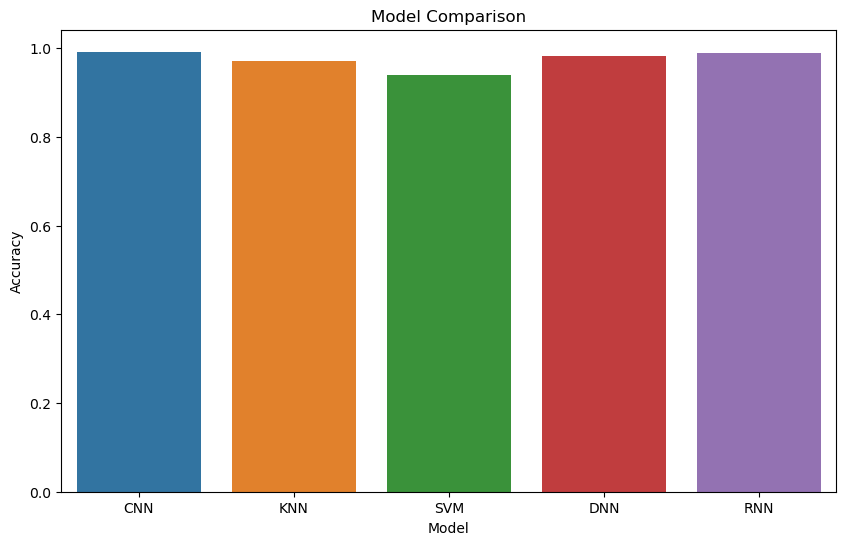

In [29]:
import numpy as np

accuracies = [accuracy_cnn, accuracy_knn, accuracy_svm, accuracy_dnn, accuracy_rnn]
model_names = ['CNN', 'KNN', 'SVM', 'DNN', 'RNN']

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()
